# **House Loan Eligibility Prediction**

# Model Building and saving the model using Pickle

1. Import required libraries and read the dataset.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/loan_approval_data.csv')
df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0.0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1.0,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0.0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0.0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0.0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [4]:
df.sample(5)

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
493,lp002582,female,no,0.0,not graduate,yes,17263,0.0,225.0,360.0,1.0,semiurban,y
594,lp002938,male,yes,0.0,graduate,yes,16120,0.0,260.0,360.0,1.0,urban,y
601,lp002950,male,yes,0.0,not graduate,NaN,2894,2792.0,155.0,360.0,1.0,rural,y
367,lp002188,male,no,0.0,graduate,no,5124,0.0,124.0,NaN,0.0,rural,n
463,lp002489,female,no,1.0,not graduate,NaN,5191,0.0,132.0,360.0,1.0,semiurban,y


In [5]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    float64
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 62.5+ KB


In [7]:
df.describe(include = 'number').T

,count,mean,std,min,25%,50%,75%,max
dependents,599.0,0.762938,1.015216,0.0,0.0,0.0,2.00,3.0
applicantincome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
coapplicantincome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
loanamount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
loan_amount_term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
credit_history,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [8]:
df.describe(include = 'O').T

,count,unique,top,freq
loan_id,614,614,lp001002,1
gender,601,2,male,489
married,611,2,yes,398
education,614,2,graduate,480
self_employed,582,2,no,500
property_area,614,3,semiurban,233
loan_status,614,2,y,422


3.Check for missing values in the dataset, if present? handle them with appropriate methods and drop redundant features.

In [9]:
df.isnull().sum()/len(df)*100

loan_id              0.000000
gender               2.117264
married              0.488599
dependents           2.442997
education            0.000000
self_employed        5.211726
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           3.583062
loan_amount_term     2.280130
credit_history       8.143322
property_area        0.000000
loan_status          0.000000
dtype: float64

In [10]:
# dropping the rows with missing vales
df.dropna(axis=0, inplace=True)

In [11]:
# Converting credit_history column to Integer datatype
df['credit_history'] = df['credit_history'].astype(int)

In [12]:
# Dropping the loan_id column
df.drop('loan_id',axis=1,inplace=True)

4. Visualize the distribution of the target column 'loan_status' with respect to various categorical features and write your observations.

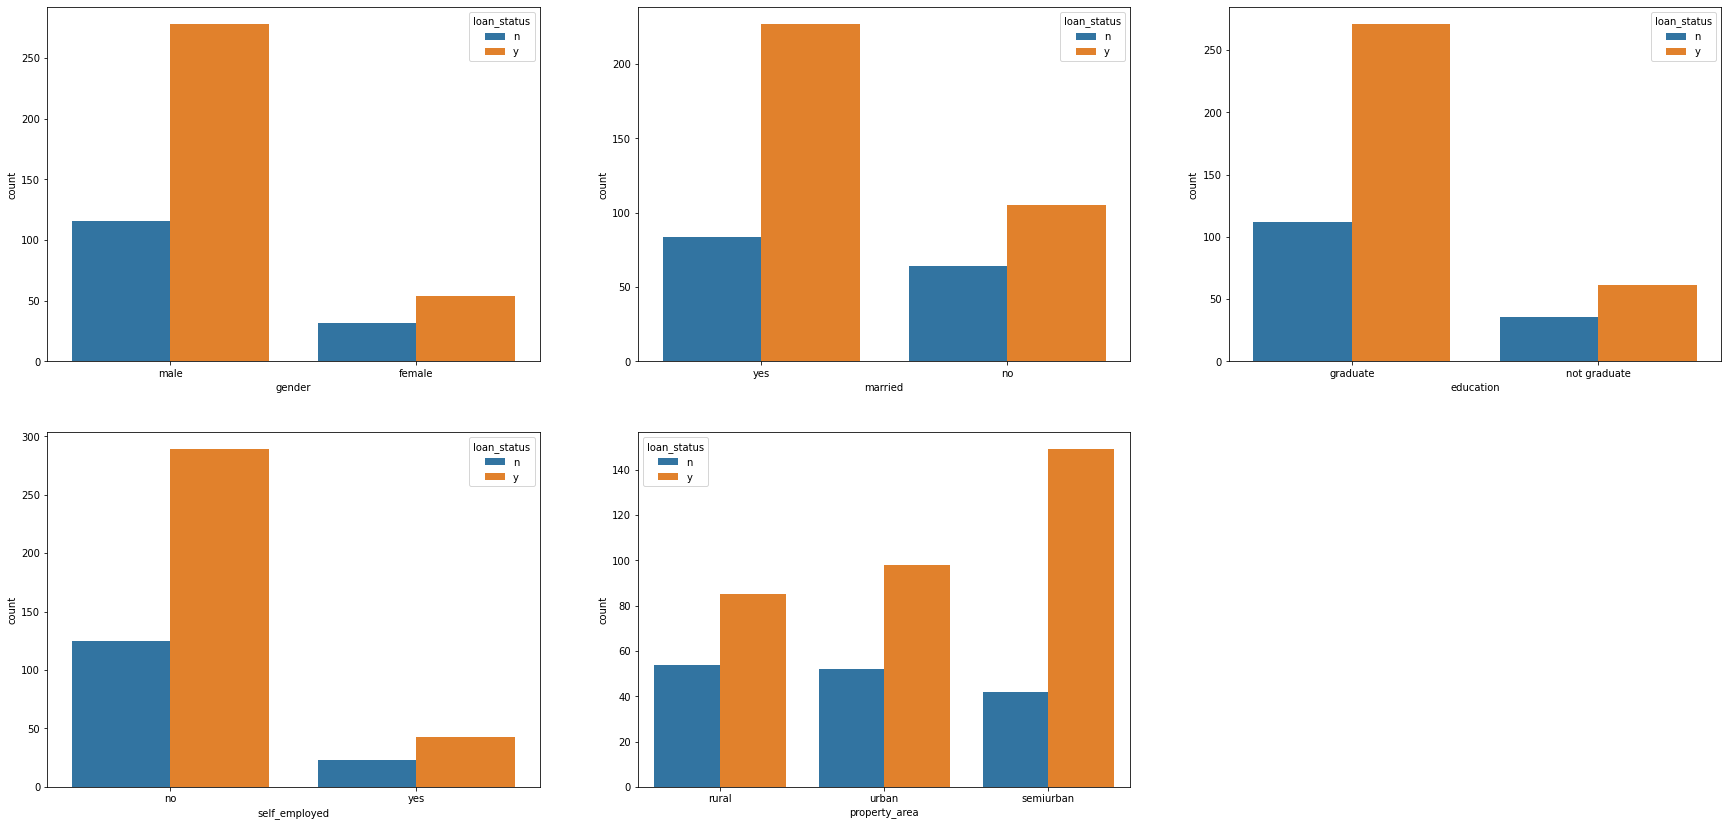

In [13]:
cat_features = ['gender','married','education','self_employed','property_area']

i=1
plt.figure(figsize=(30,30))
for feature in cat_features:
    plt.subplot(4,3,i)
    sns.countplot(x=feature,hue='loan_status',data=df)
    i+=1

*   Majority of the Loan holder are male as compared to females.
*   Most of the loan holders are married and have a graduate degree and are not self employed.

5. Encode the categorical data.

In [14]:
# Label encoding property_area
object_type_variables=[i for i in df.columns if df.dtypes[i]==object]
object_type_variables

le =LabelEncoder()

def encoder(df):
    for i in object_type_variables:
        q=le.fit_transform(df[i].astype(str))
        df[i]=q
        df[i]=df[i].astype(int)
encoder(df)

In [15]:
df.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
1,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0.0,0,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0.0,0,0,6000,0.0,141.0,360.0,1,2,1
5,1,1,2.0,0,1,5417,4196.0,267.0,360.0,1,2,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             480 non-null    int64  
 1   married            480 non-null    int64  
 2   dependents         480 non-null    float64
 3   education          480 non-null    int64  
 4   self_employed      480 non-null    int64  
 5   applicantincome    480 non-null    int64  
 6   coapplicantincome  480 non-null    float64
 7   loanamount         480 non-null    float64
 8   loan_amount_term   480 non-null    float64
 9   credit_history     480 non-null    int64  
 10  property_area      480 non-null    int64  
 11  loan_status        480 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 64.9 KB


6. Separate the target and independent features and split the data into train and test.

In [17]:
X=df.drop('loan_status',axis=1)
y=df['loan_status']

In [18]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.30)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(336, 11) (144, 11)
(336,) (144,)


In [19]:
X_train.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
220,1,1,0.0,0,0,2221,0.0,60.0,360.0,0,2
105,1,1,1.0,0,0,3052,1030.0,100.0,360.0,1,2
345,1,1,0.0,0,0,2499,2458.0,160.0,360.0,1,1
174,1,1,0.0,1,1,4344,736.0,87.0,360.0,1,1
341,0,0,0.0,0,0,2378,0.0,46.0,360.0,1,0


In [20]:
X_test.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area
428,1,1,0.0,0,0,2920,16.120001,87.0,360.0,1,0
607,1,1,2.0,1,0,3987,1411.000000,157.0,360.0,1,0
101,1,0,0.0,0,0,4843,3806.000000,151.0,360.0,1,1
458,1,0,2.0,0,0,4354,0.000000,136.0,360.0,1,0
412,1,1,0.0,1,0,6096,0.000000,218.0,360.0,0,0


7. Build any classification model to predict the loan status of the customer and save your model using pickle.

In [21]:
def fit_n_predict(model, X_train, X_test, y_train, y_test): 
    # Fit the model with train data
    model.fit(X_train, y_train)
    
    # Making prediction on test set
    pred=model.predict(X_test)
    
    # Calculating the accuracy score
    accuracy = accuracy_score(y_test, pred)
    
    return accuracy 

In [22]:
# Initializing the Models

lr = LogisticRegression()
nb = GaussianNB()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adb = AdaBoostClassifier()
gb = GradientBoostingClassifier()

estimators = [('rf',rf),('knn',knn),('gb',gb),('adb',adb)]
sc = StackingClassifier(estimators = estimators, final_estimator=rf)

In [23]:
result = pd.DataFrame(columns = ['Accuracy'])

for model, model_name in zip([lr,nb,knn,dt,rf,adb,gb,sc],
                            ['Logistic Regression','Naive Bayes','KNN','Descision Tree',
                            'Random Forest','Ada Boost','Gradient Boost','Stacking']):  
    result.loc[model_name] = fit_n_predict(model,X_train, X_test, y_train, y_test)

In [24]:
result

,Accuracy
Logistic Regression,0.784722
Naive Bayes,0.756944
KNN,0.638889
Descision Tree,0.694444
Random Forest,0.770833
Ada Boost,0.784722
Gradient Boost,0.756944
Stacking,0.763889


**Logistic Regression has the highest accuracy score of 81.25%**

In [25]:
# Using Logistic Regression
lr = LogisticRegression()

model = lr.fit(X_train,y_train)

y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7847222222222222


In [26]:
import pickle
# Saving model to disk
pickle.dump(rf, open('model_loan.pkl','wb'))